<a href="https://colab.research.google.com/github/D1N3SH-DEV/BFA/blob/main/INTM572_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Fiday Sale Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


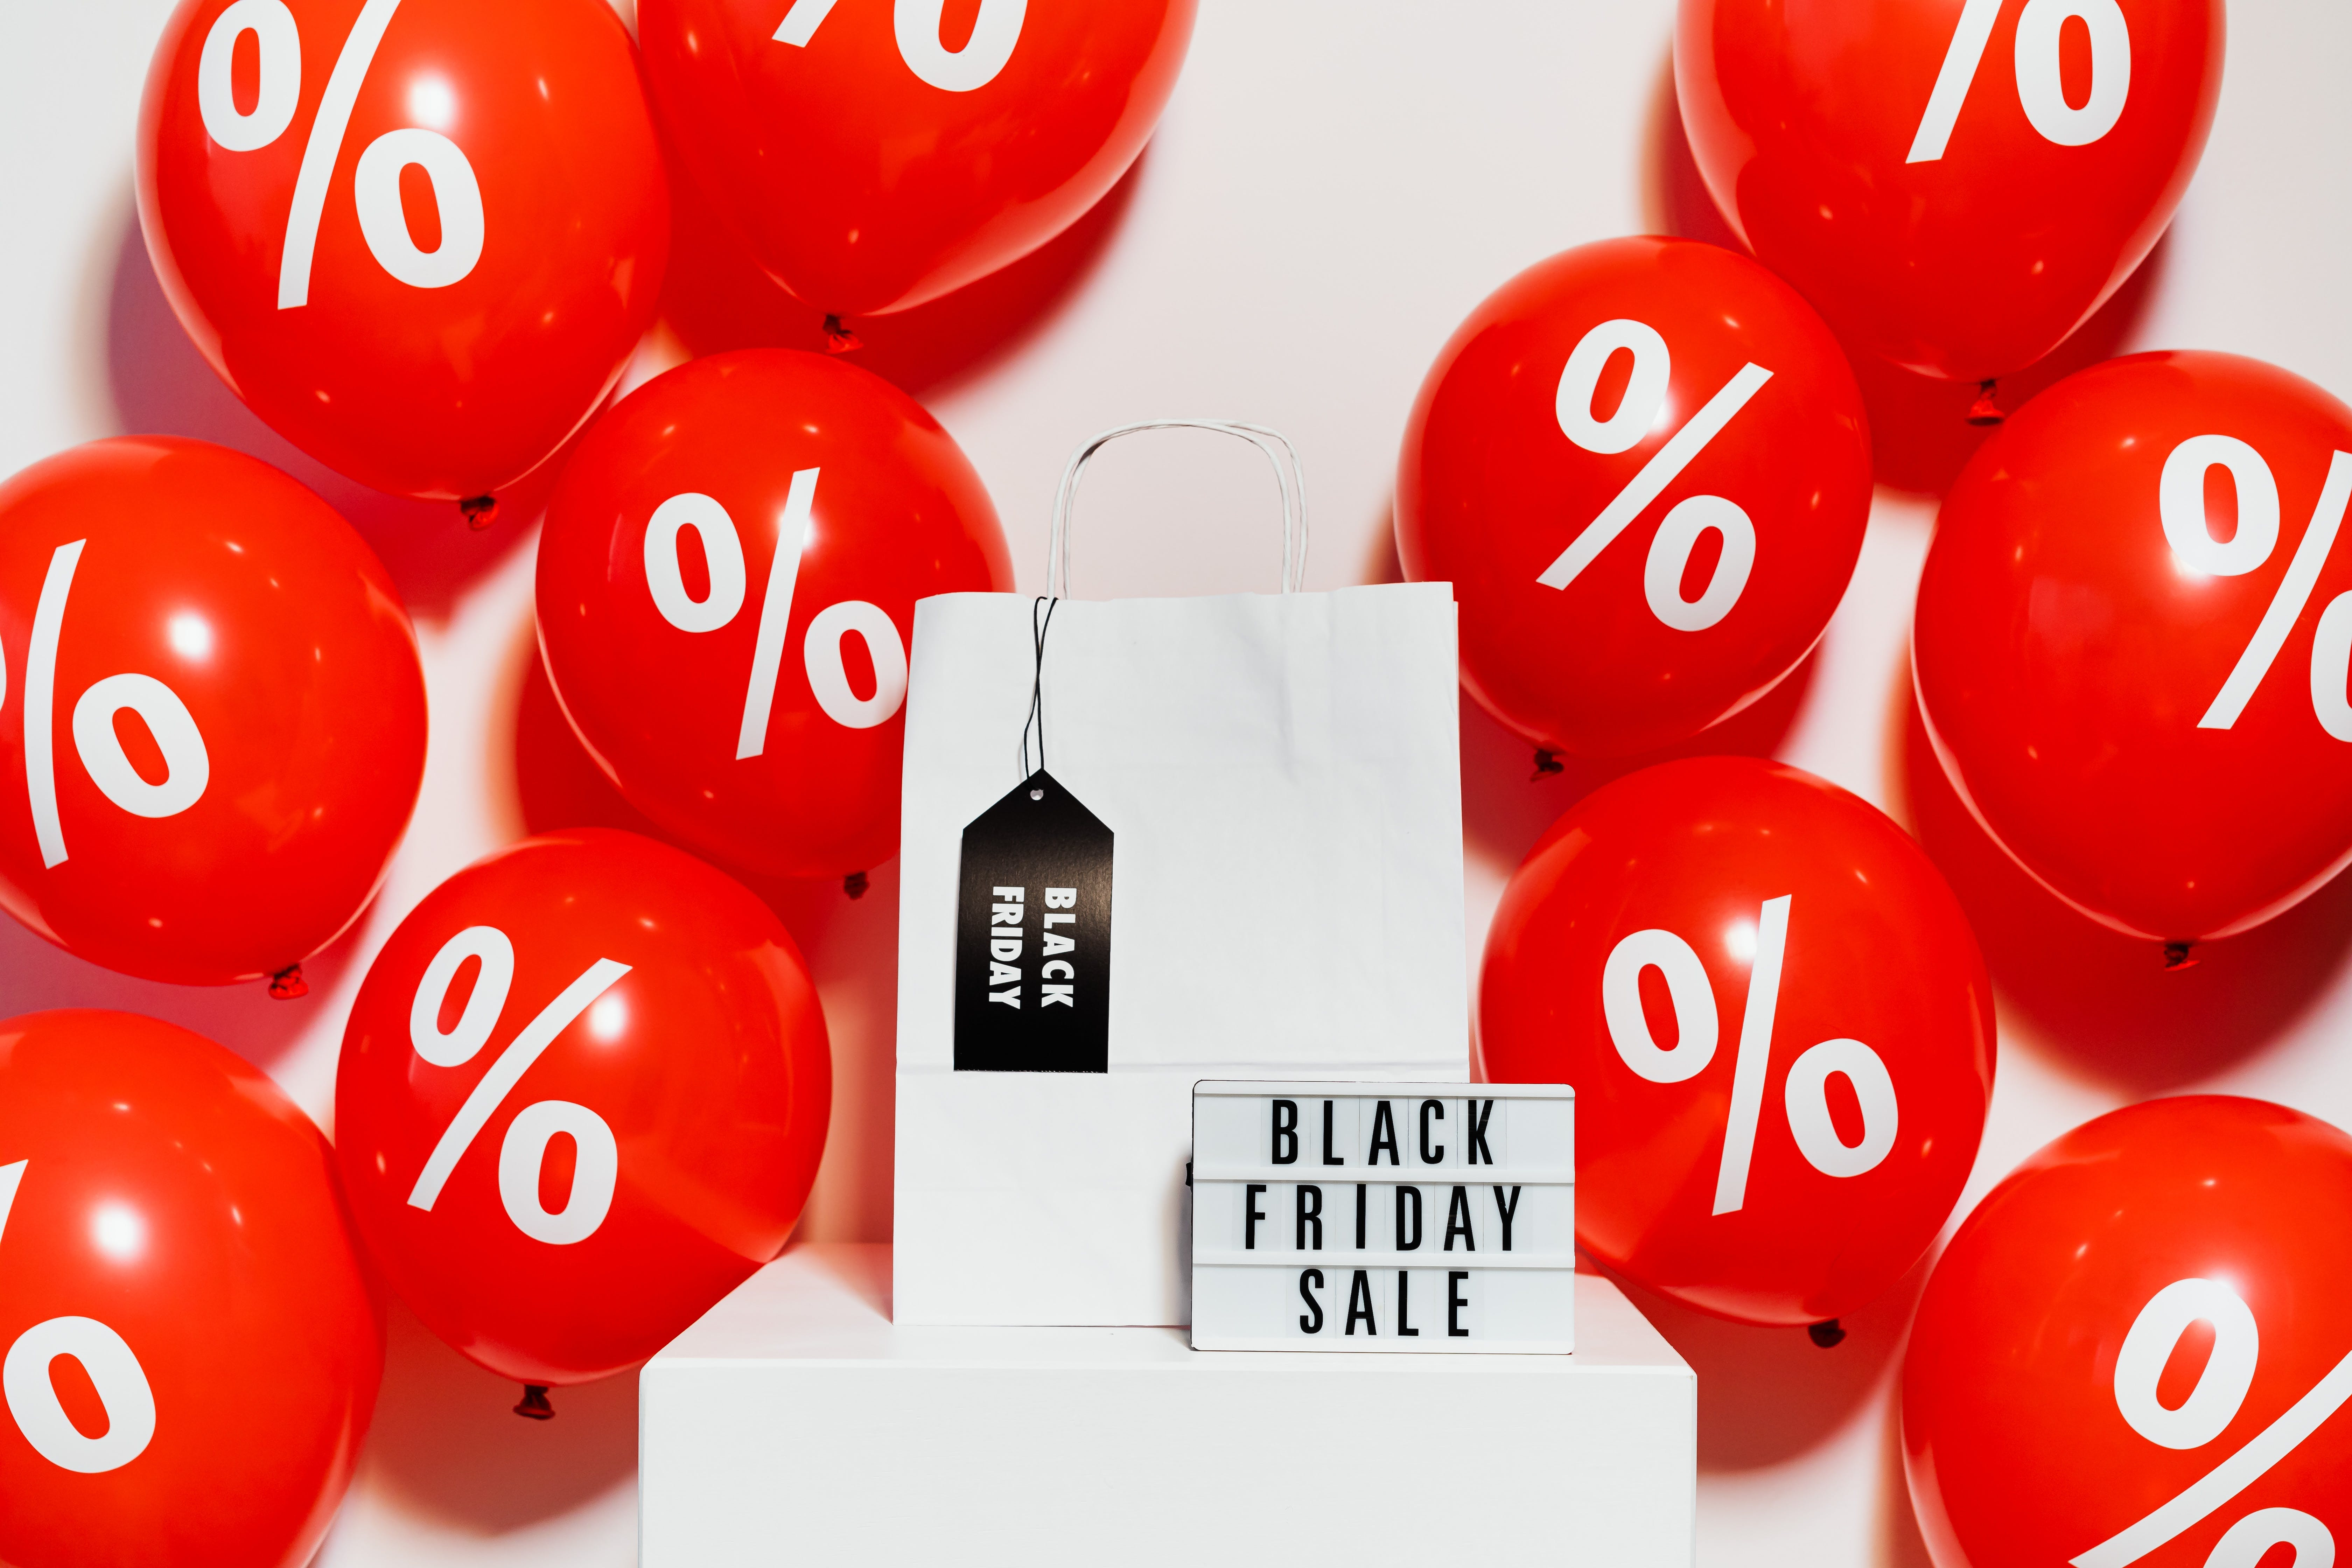

In [2]:
from IPython.display import Image
image_path = '/content/drive/My Drive/DatasetCapstone/bfs.jpg'
Image(filename=image_path)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')
plt.rcParams["patch.force_edgecolor"] = True

In [81]:
data = pd.read_csv("/content/drive/My Drive/DatasetCapstone/blackfriday.csv")
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Exploration:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Let's check the number of distinct users available in the dataset. As this dataset can contain redundant user ids:

In [6]:
print("Total users:\t",data['User_ID'].nunique())

Total users:	 5891


### Now let's check number of distinct product ids available in the dataset:

In [7]:
print("Total products:\t",data['Product_ID'].nunique())

Total products:	 3631


### Finding age groups associated with the dataset:

In [8]:
print("Total age group listed:\t",data['Age'].unique())

Total age group listed:	 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


### Here we see that the column 'Occupation' exactly doesn't have the occupation name but may be listed in number, which could be referring to the occupation name indirectly. So,let's segragate the number of distinct occupations available in the dataset:

In [9]:
print("Total occupations listed:\t",data['Occupation'].unique())

Total occupations listed:	 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


### Let's see the city categories that are available in the dataset:

In [10]:
print("City categories available in the dataset:\t",data['City_Category'].unique())

City categories available in the dataset:	 ['A' 'C' 'B']


### Marital status could be diverse, so let's find out the distinct marital status, post which we can understand the statuses available in the dataset:

In [11]:
print("Marital stauses in the dataset are:\t",data['Marital_Status'].unique())

Marital stauses in the dataset are:	 [0 1]


In [82]:
data['Marital_Status'].replace(to_replace=0, value='Unmarried', inplace=True)
data['Marital_Status'].replace(to_replace=1, value='Married', inplace=True)
print("Marital stauses in the dataset are:\t",data['Marital_Status'].unique())

Marital stauses in the dataset are:	 ['Unmarried' 'Married']


### Categorizations available for each product category respectively as shown below:

In [12]:
print("Categories avalilable in Product_Category_1:\t",sorted(data['Product_Category_1'].unique()))
print("Categories avalilable in Product_Category_2:\t",sorted(data['Product_Category_2'].unique()))
print("Categories avalilable in Product_Category_3:\t",sorted(data['Product_Category_3'].unique()))

Categories avalilable in Product_Category_1:	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Categories avalilable in Product_Category_2:	 [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Categories avalilable in Product_Category_3:	 [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


# Data Overview
## Dataset has 550068 rows and 12 columns as described below:

1. User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
2. Product_ID: Unique ID of the product. There are a total of 3631 products in the dataset.
3. Gender: gender of the person.
4. Age: age group of the person.
5. Occupation: indicates occupation of the user referred to as numbers between 0 and 20.
6. City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
7. Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
8. Marital_Status: shows either 0 or 1, where 0 is unmarried and 1 is married.
9. Product_Category_1: Category of the product 1. (20 categories)
10. Product_Category_2: Category of the product 2. (18 categories including 'NaN')
11. Product_Category_3: Category of the product 3. (16 categories including 'NaN')
12. Purchase: Purchase amount.

### Or simply we can use the lambda function to directly discover the uniqueness across the features available in the dataset among the entries as below:

In [13]:
data.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

### Statistical Analysis of the dataset:

In [83]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,Unmarried,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,15.000000,16.000000,12054.000000


### Here based on the above observation, we can find some interesting insights for 'top' category as mentioned below:
1. Product_ID 'P0265242' is highly purchased product.
2. Most of the genders are men (M).
3. 26-35 age group has the most purchases.
4. Customers bearing from City_Category'B' have the most purchases.
5. Unmarried customers are at the top in Marital_Status

### Checking the total number of missing values in the dataset for each column respectively:

In [15]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### In advance, we can visualize the distribution of null values in the dataset from the heatmap as shown below:

<Axes: >

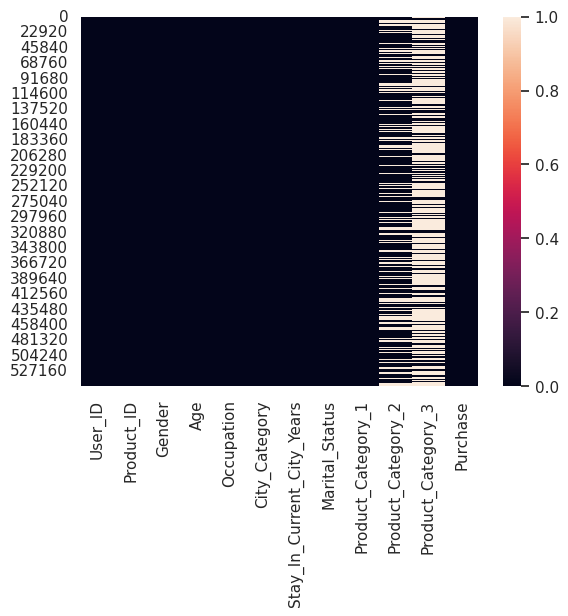

In [17]:
sns.heatmap(data.isna())

### Getting in-depth analysis of the missing values:

In [18]:
missing_values = pd.DataFrame({'Total missing':data.isna().sum(), 'missing_percent':(data.isna().sum()/data.isna().count()*100).round(2)})

missing_values.sort_values(by='Total missing')

,Total missing,missing_percent
User_ID,0,0.00
Product_ID,0,0.00
Gender,0,0.00
Age,0,0.00
Occupation,0,0.00
City_Category,0,0.00
Stay_In_Current_City_Years,0,0.00
Marital_Status,0,0.00
Product_Category_1,0,0.00
Purchase,0,0.00


### From the above observation we can see that:
1. 69.68% values from the Product_Category_3	column are missing
2. 31.57% values from the Product_Category_2 column are missing

### Let's visualize the age category distribution across the dataset:

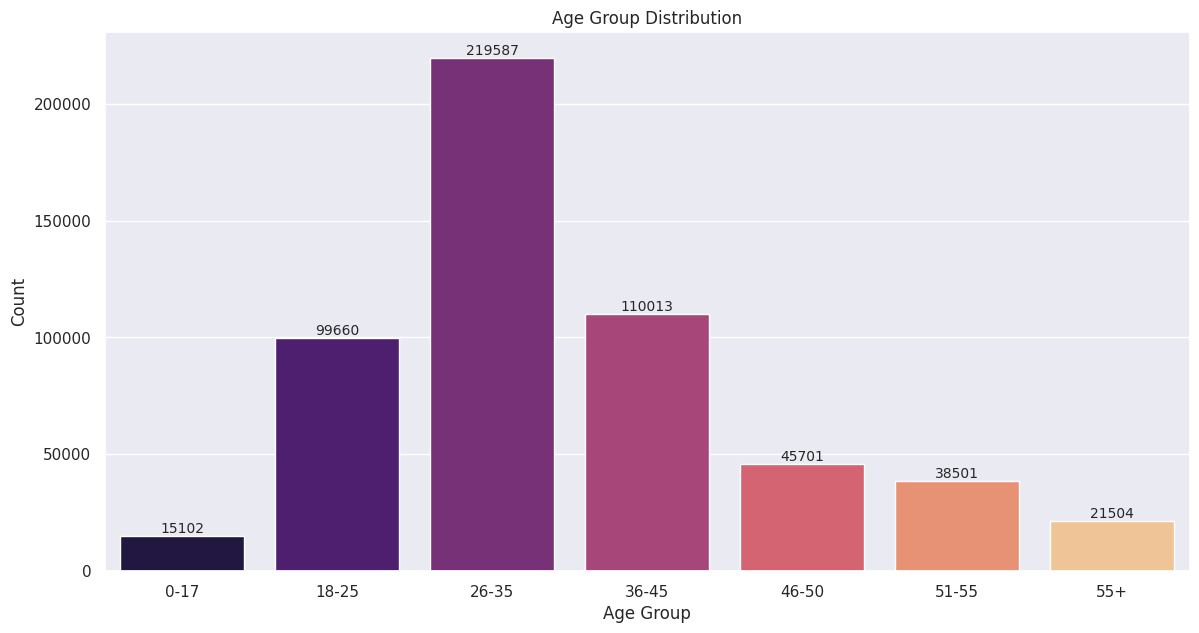

In [20]:
# Plotting the count of each age group
fig, ax = plt.subplots(figsize=(14, 7))

age_counts = data['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, ax=ax, palette="magma")
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Age Group Distribution')
for i, count in enumerate(age_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

### Based on the above observation, we came to know few insights as given below:
1. Category 0-17: We have 15102 customers.  
2. Category 18-25: We have 99660 customers.
3. Category 26-35: We have 219587 customers.
4. Category 36-45: We have 110013 customers.
5. Category 46-50: We have 45701 customers.
6. Category 51-55: We have 38501 customers.
7. Category 55+: We have 21504 customers.

### This shows most customers are based on the age range between 26-35.

### Occupation distribution via countplot:

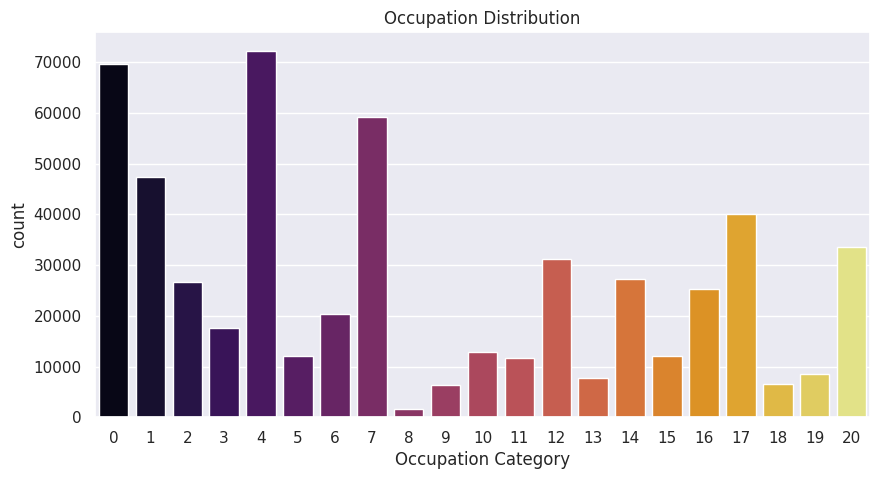

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='Occupation',palette="inferno", ax=ax)
ax.set_xlabel('Occupation Category')
ax.set_title('Occupation Distribution')
plt.show()

### Let's see the distribution of cities:

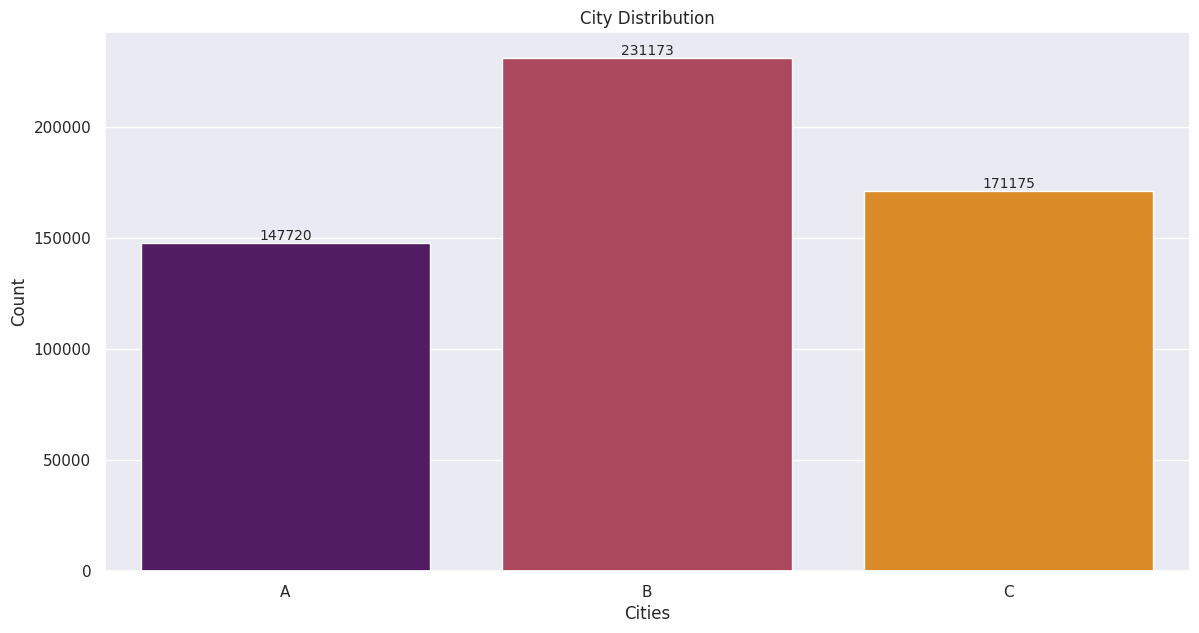

In [24]:
# Plotting the count of each city counts
fig, ax = plt.subplots(figsize=(14, 7))

city_counts = data['City_Category'].value_counts().sort_index()
sns.barplot(x=city_counts.index, y=city_counts.values, ax=ax, palette="inferno")
ax.set_xlabel('Cities')
ax.set_ylabel('Count')
ax.set_title('City Distribution')
for k, count in enumerate(city_counts):
    ax.text(k, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

### Marital status distribution:

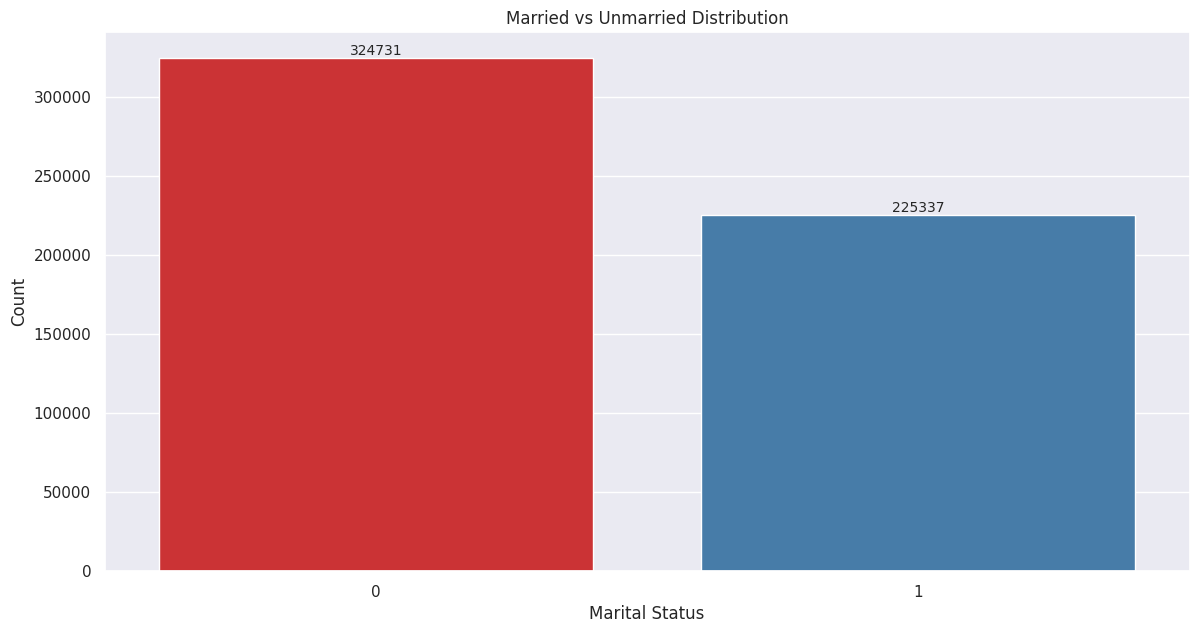

In [25]:
# Plotting the count of each Marital Status
fig, ax = plt.subplots(figsize=(14, 7))

marital_counts = data['Marital_Status'].value_counts().sort_index()
sns.barplot(x=marital_counts.index, y=marital_counts.values, ax=ax, palette="Set1")
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_title('Married vs Unmarried Distribution')
for l, count in enumerate(marital_counts):
    ax.text(l, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

### Purchase behavior analysis based on the genders:

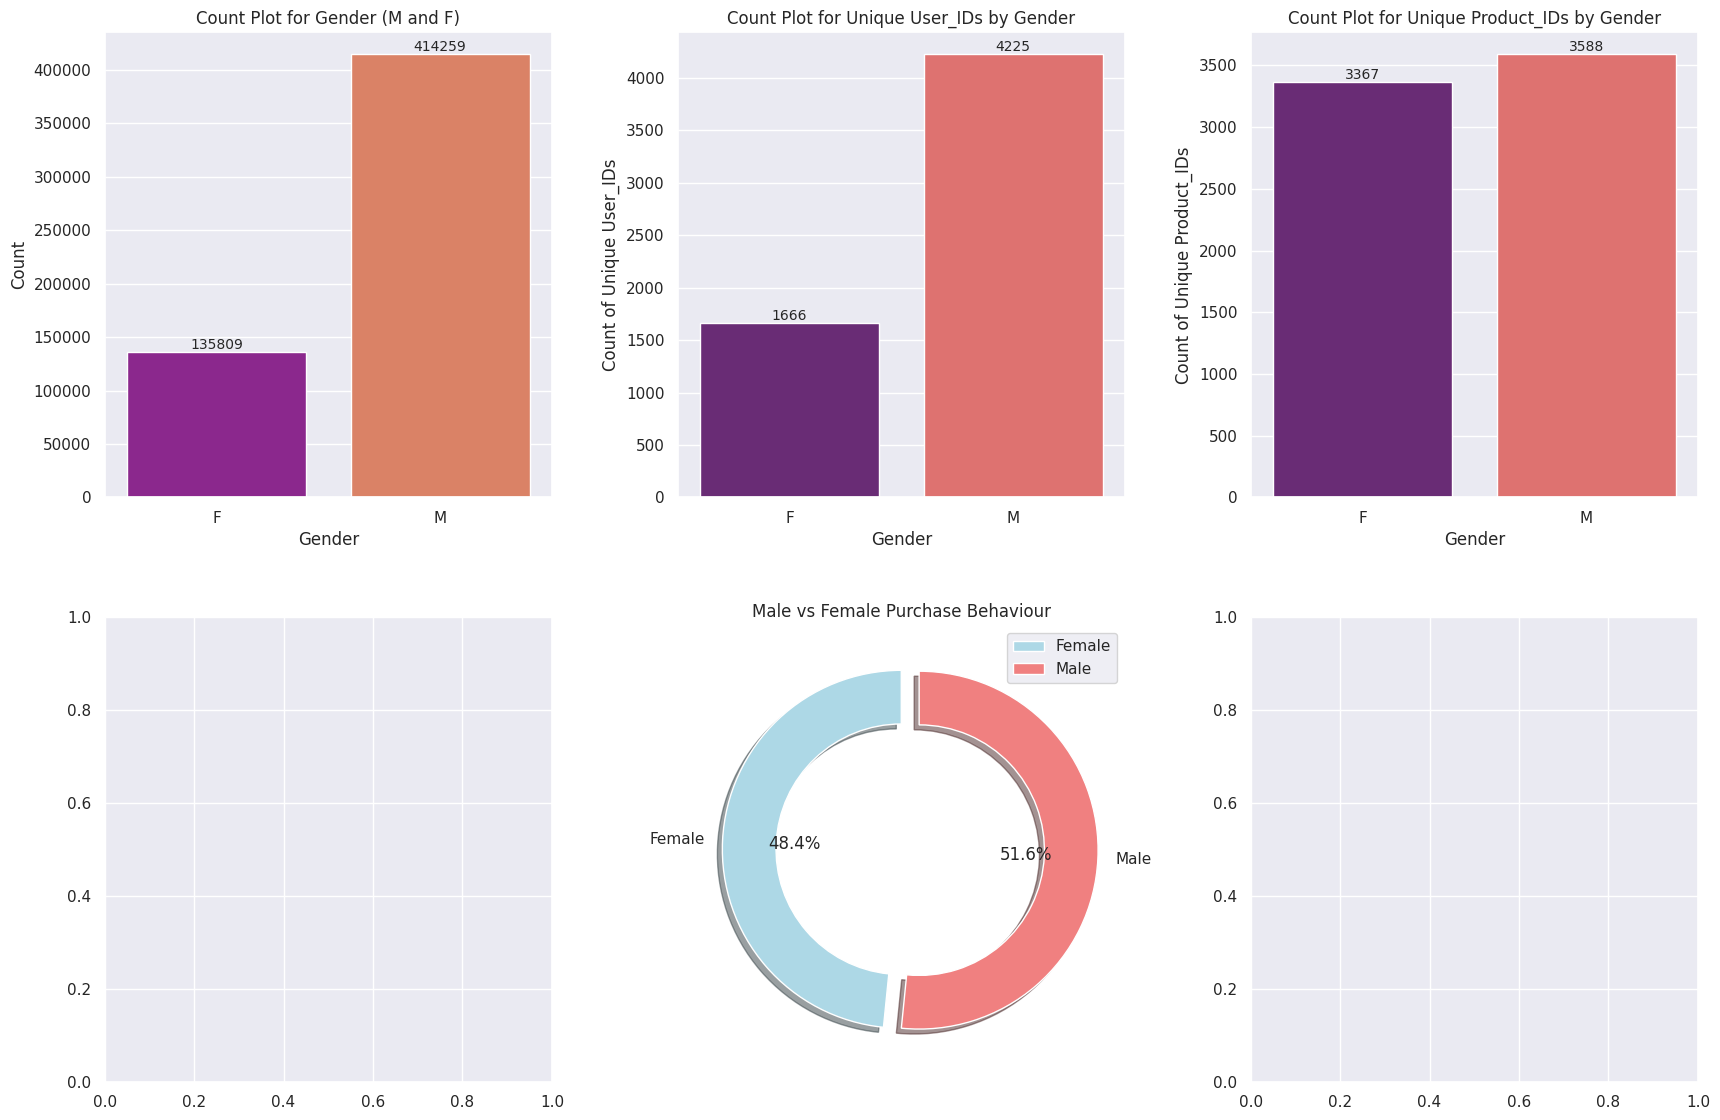

In [37]:
# Create a figure with a grid layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Subplot 1: Count Plot for Gender (M and F) with annotations
sns.countplot(data=data[data['Gender'].isin(['M', 'F'])], x='Gender', palette='plasma', ax=axes[0, 0])
axes[0, 0].set_title('Count Plot for Gender (M and F)')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
gender_counts = data['Gender'].value_counts().sort_index()
for i, count in enumerate(gender_counts):
    axes[0, 0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Subplot 2: Count Plot for Unique User_IDs by Gender with annotations
sns.countplot(data=data.drop_duplicates(subset=['Gender', 'User_ID']), x='Gender', palette='magma', ax=axes[0, 1])
axes[0, 1].set_title('Count Plot for Unique User_IDs by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count of Unique User_IDs')
unique_user_counts = data.drop_duplicates(subset=['Gender', 'User_ID'])['Gender'].value_counts().sort_index()
for i, count in enumerate(unique_user_counts):
    axes[0, 1].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Subplot 3: Count Plot for Unique Product_IDs by Gender with annotations
sns.countplot(data=data.drop_duplicates(subset=['Gender', 'Product_ID']), x='Gender', palette='magma', ax=axes[0, 2])
axes[0, 2].set_title('Count Plot for Unique Product_IDs by Gender')
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Count of Unique Product_IDs')
unique_product_counts = data.drop_duplicates(subset=['Gender', 'Product_ID'])['Gender'].value_counts().sort_index()
for i, count in enumerate(unique_product_counts):
    axes[0, 2].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Subplot 4: Pie chart for Male vs Female Purchase Behaviour
axes[1, 1].axis('off')  # Turn off the axis for this subplot
colors = ['lightblue', 'lightcoral']
axes[1, 1].pie(data.groupby('Gender')['Product_ID'].nunique(), labels=['Female', 'Male'], autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.3), explode=(0, 0.1), shadow=True)
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_title('Male vs Female Purchase Behaviour')

plt.tight_layout(pad=3.0)
plt.show()

### Gaining insights based on Purchase vs Age, Purchase vs Occupation and Purchase vs Stay in Current City via lineplot:

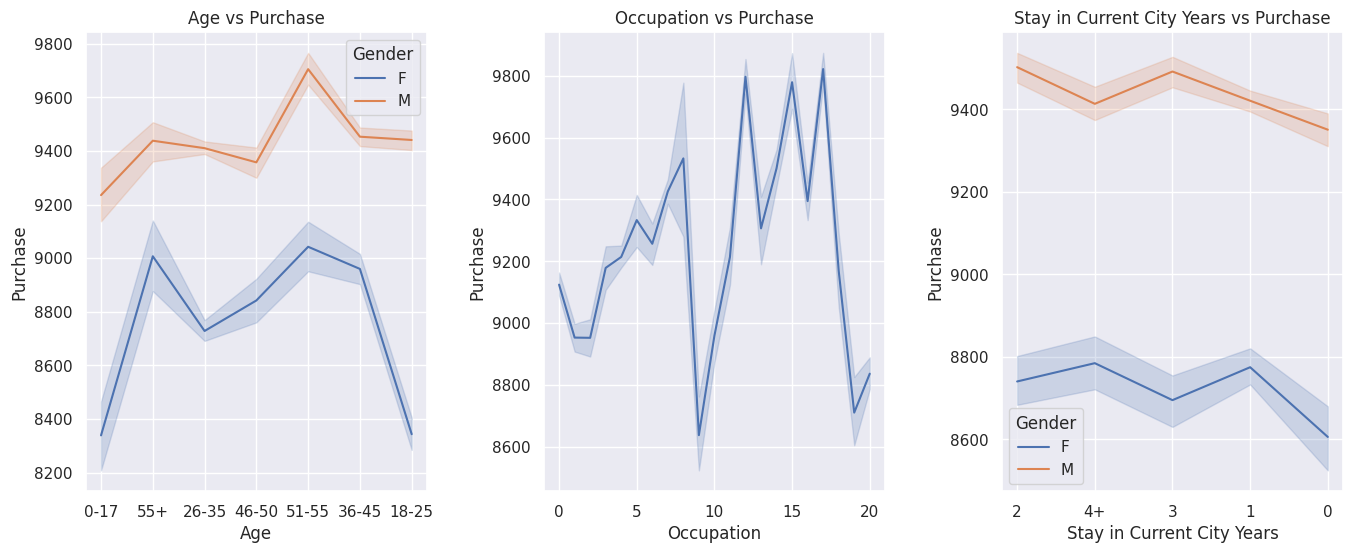

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
ax = ax.ravel()

# Line plot for Age vs Purchase with different colors for Gender
sns.lineplot(data=data, x='Age', y='Purchase', hue='Gender', ax=ax[0])
ax[0].set_title('Age vs Purchase')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Purchase')

# Line plot for Occupation vs Purchase
sns.lineplot(data=data, x='Occupation', y='Purchase', ax=ax[1], sort=True)
ax[1].set_title('Occupation vs Purchase')
ax[1].set_xlabel('Occupation')
ax[1].set_ylabel('Purchase')

# Line plot for Stay_In_Current_City_Years vs Purchase with different colors for Gender
sns.lineplot(data=data, x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', ax=ax[2])
ax[2].set_title('Stay in Current City Years vs Purchase')
ax[2].set_xlabel('Stay in Current City Years')
ax[2].set_ylabel('Purchase')

plt.tight_layout(pad=2.0)
plt.show()

### From the above observations we conclude as follows:
1. Age vs Purchase: Males between age 51-55 have the highest purchase amount and females between age51-55 also have the highest purchase amount.
2. Occuaption vs Purchase: Occupation between 11-17 have high spikes, which resembles high purchase amount.
3. Stay in Current City Years vs Purchase: Males who live for 2 years in the current city have the highest purchase amount and on the other hand, females living in the current city for more than 4 years have highest purchase amount.

# Let's find the correlation between the features available in the dataset before handling the null values in the respective columns:

Correlation analysis is a statistical method used to evaluate the strength and direction of the linear relationship between two quantitative variables. The result of a correlation analysis is expressed as a correlation coefficient, which indicates the degree to which the variables tend to change together.

<ipython-input-84-5793e2eefe12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


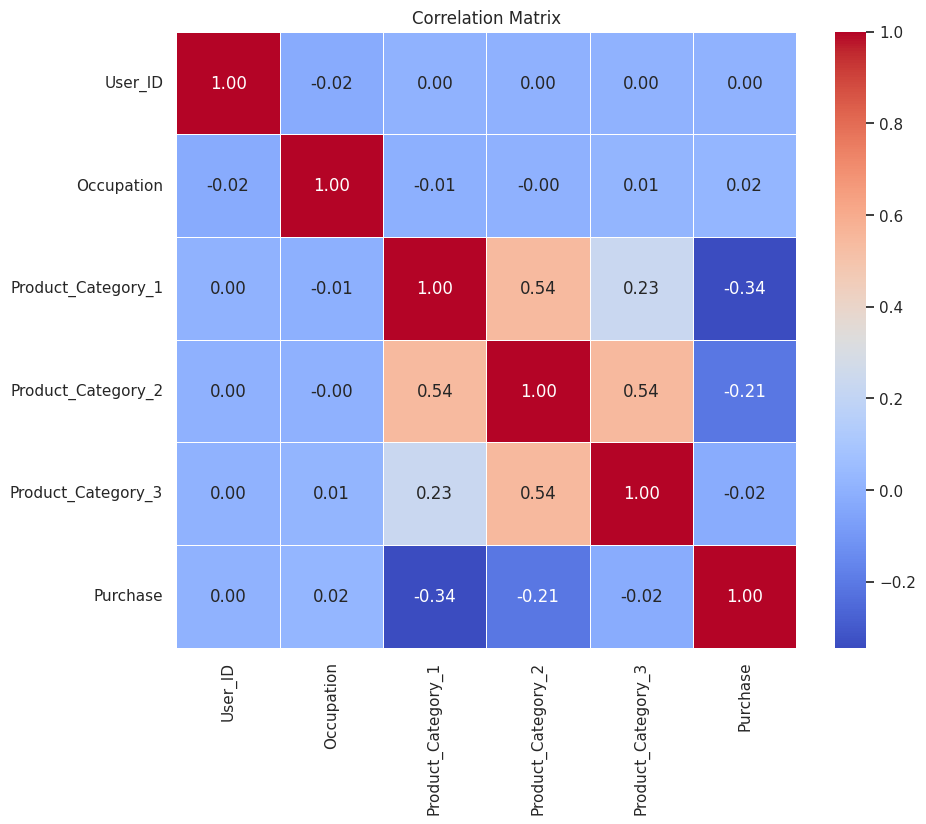

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Here from the above correlation we can obserserve as follows:
1. Positive Correlation (r=1): Here, it indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.
2. Negative Correlation (r=-1): Here, it indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.
3. Neutral (r=0): Here, it indicates no linear correlation between the variables.

# Checking for outliers if any:
Outliers detection is neccessary, as the outliers can have major impact on correlation analysis.
Outlier detection for all the columns, skipping the boxplots for the datatype other than integer.

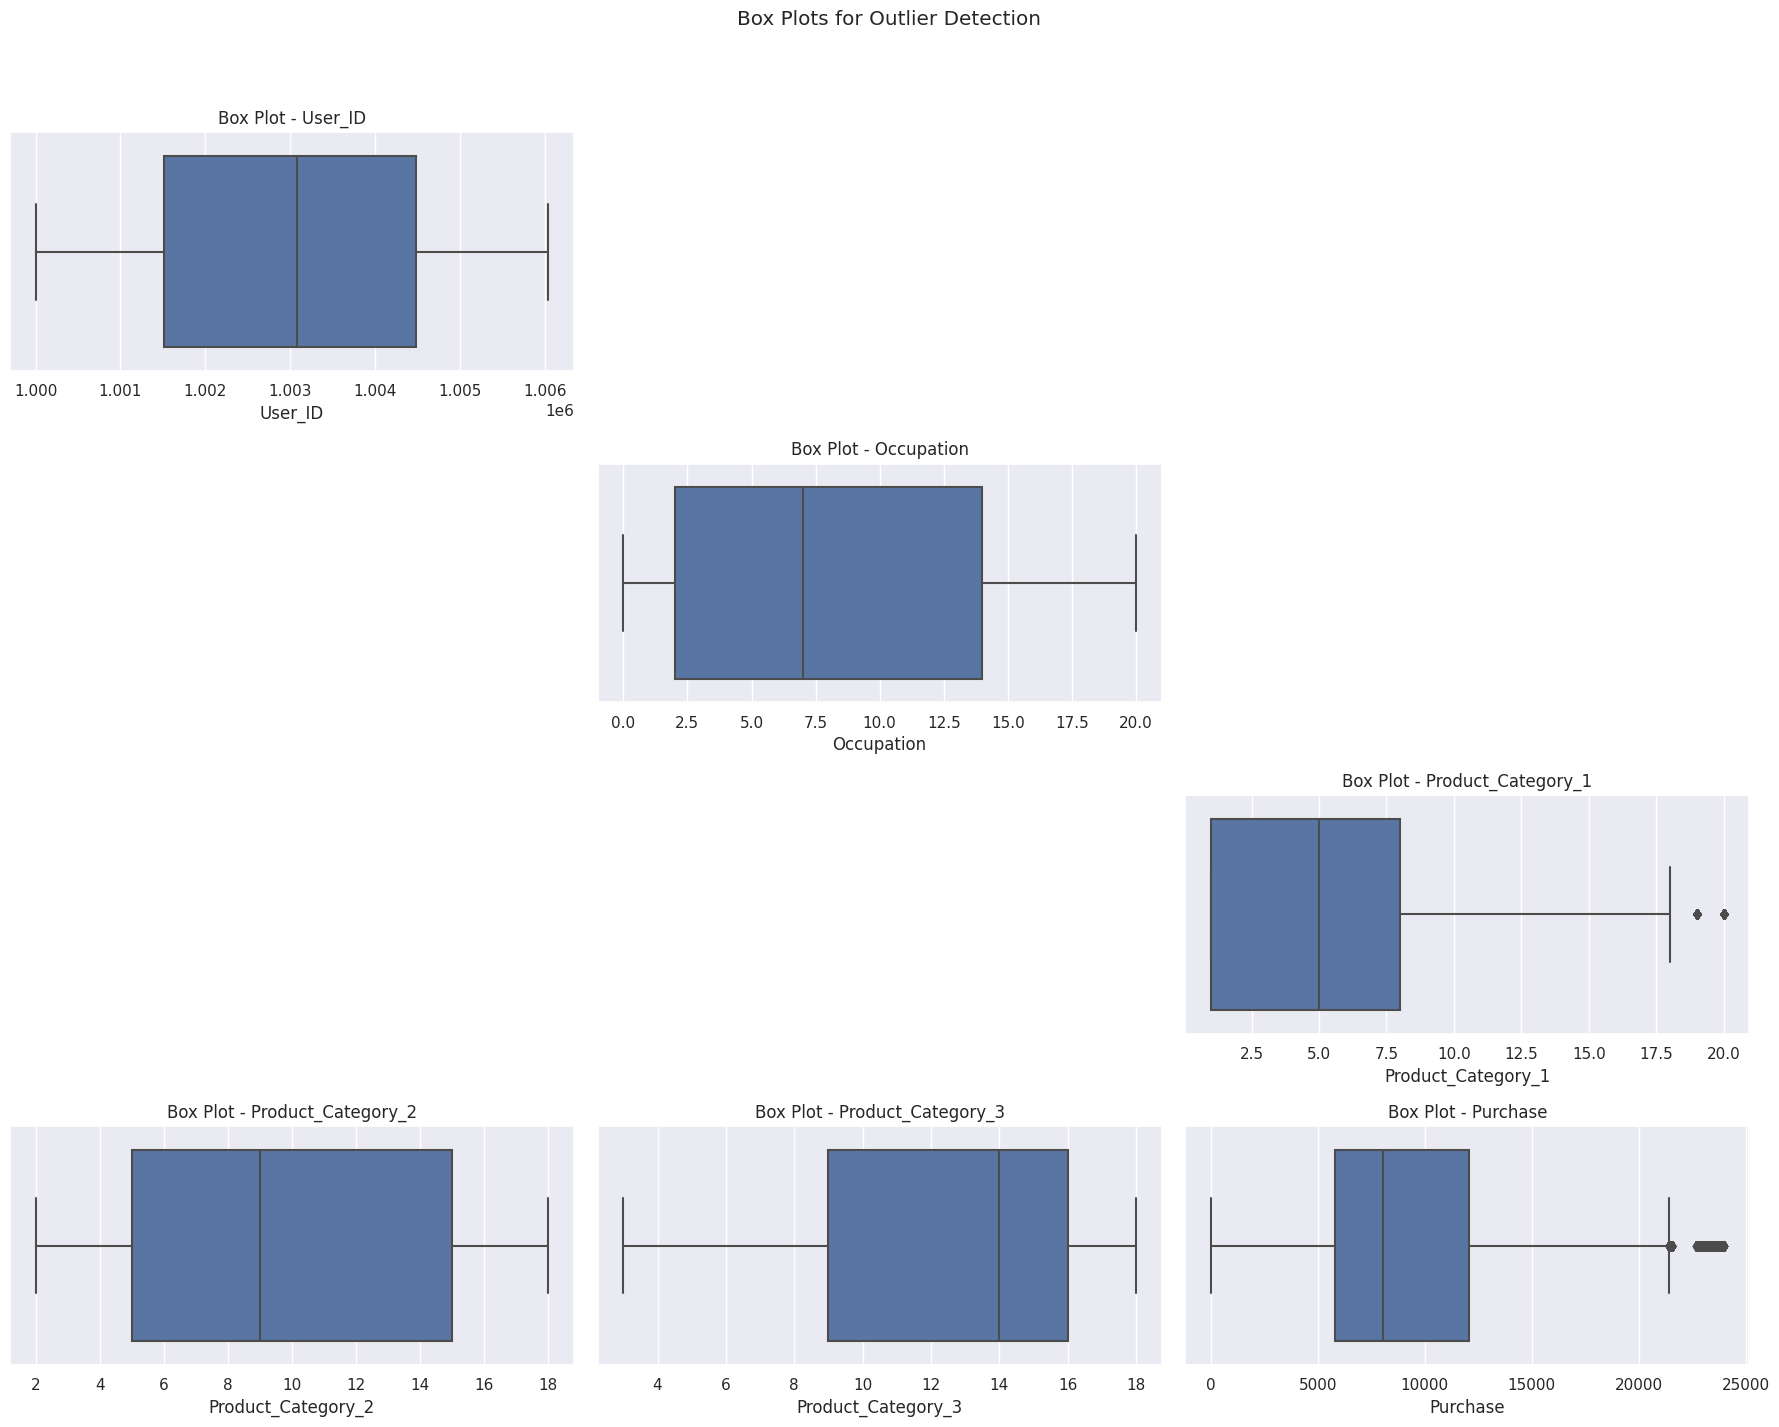

In [85]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
fig.suptitle('Box Plots for Outlier Detection')
axes = axes.flatten()

# Looping through each column in the DataFrame
for i, column in enumerate(data.columns):
    # Checking if the column is numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        # Creating a box plot for the current numeric column
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot - {column}')
    else:
        # If the column is not numeric, skipping the box plot
        axes[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Now that we have detected outliers in two columns i.e. 'Product_Category_1'. Let's deal with the outliers by filtering them using Interquartile Range (IQR) method to define the acceptable range:

In [105]:
# Calculate the interquartile range (IQR) for 'Product_Category_1'
Q1 = data['Product_Category_1'].quantile(0.25)
Q3 = data['Product_Category_1'].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range based on IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out rows with 'Product_Category_1' values outside the acceptable range
filtered_data = data[(data['Product_Category_1'] >= lower_limit) & (data['Product_Category_1'] <= upper_limit)]

Let's verify the outliers that has been normalized via Box plot:

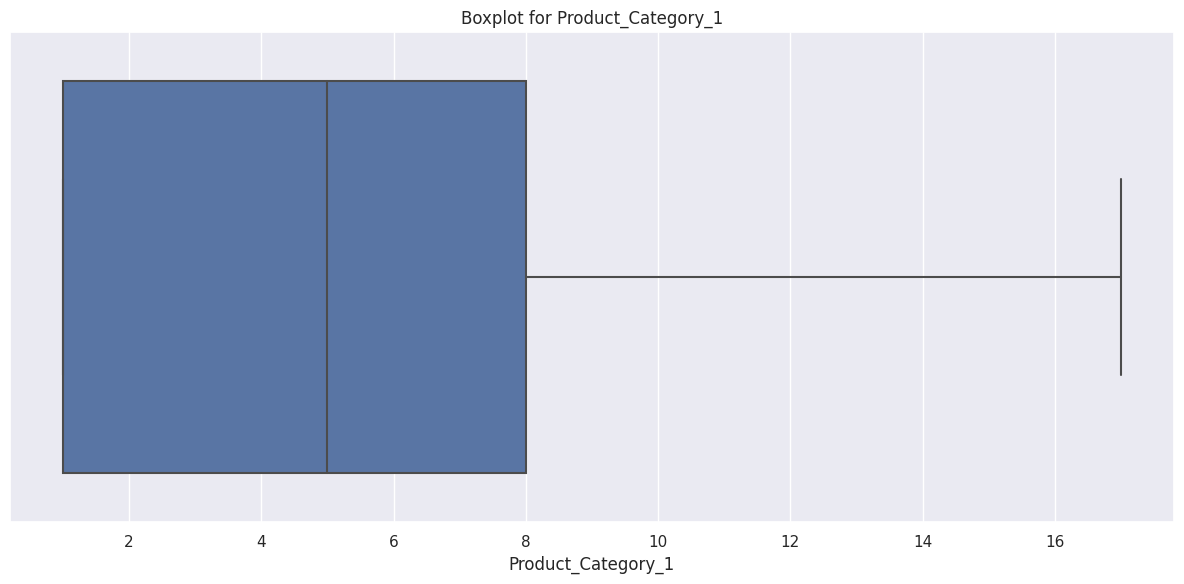

In [106]:
plt.figure(figsize=(12, 6))

# Boxplot for 'Product_Category_1'
sns.boxplot(x=data_filtered['Product_Category_1'])
plt.title('Boxplot for Product_Category_1')

plt.tight_layout()
plt.show()

<ipython-input-107-0f71a6196a16>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


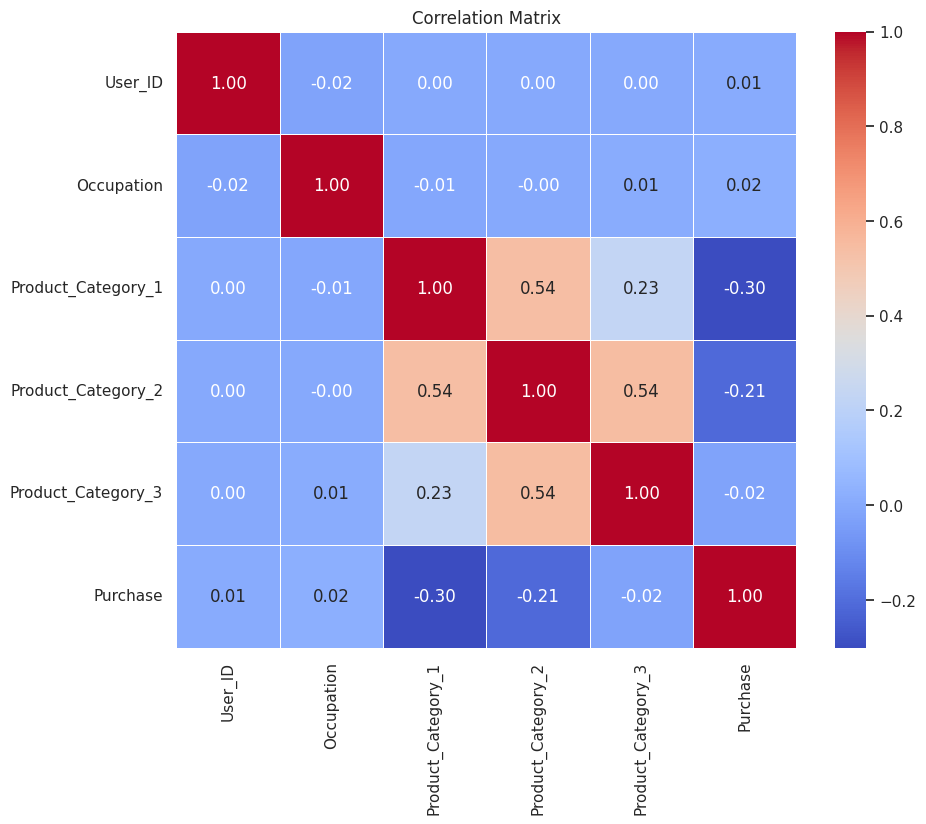

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Examples of correlation:

'Purchase' and 'Product_Category_1' have negative correlation coefficient (-0.30) i.e. if one increases, another decreases. Let's observe how the scatter plot reacts to this situation and see the scatter process:

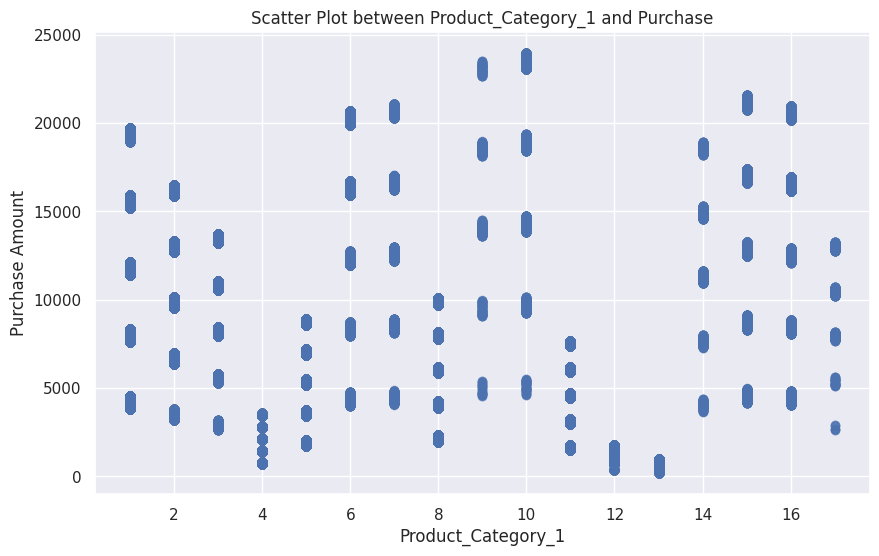

In [101]:
# Scatter plot between 'Product_Category_1' and 'Purchase'
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['Product_Category_1'], data_filtered['Purchase'], alpha=0.5)
plt.title('Scatter Plot between Product_Category_1 and Purchase')
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase Amount')
plt.show()

From the correlation matrix, 'Product_Category_1 vs Product_Category_2' and 'Product_Category_2 vs Product_Category_3' we see a positive correlation between then of same value i.e. 0.54. This means, they have direct proportionality, where if one value increases, another increase.
Now, let's observe both the reaction of scatter plot.

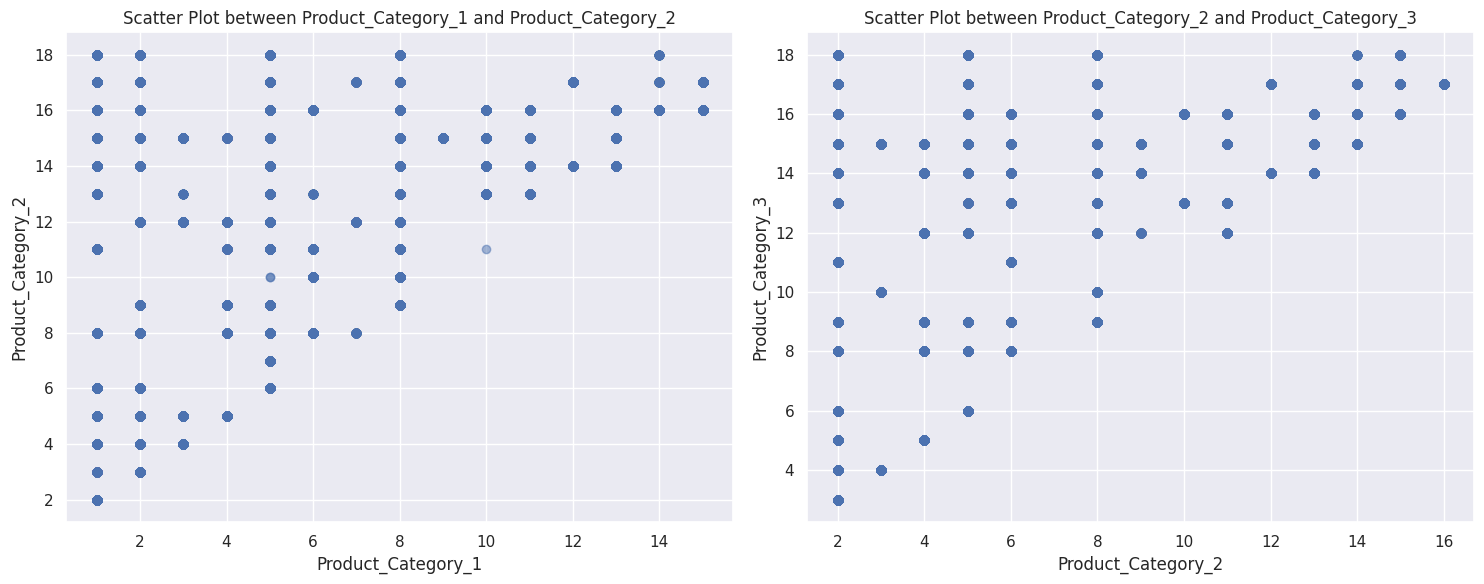

In [102]:
# Scatter plot between 'Product_Category_1' and 'Product_Category_2'
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_filtered['Product_Category_1'], data_filtered['Product_Category_2'], alpha=0.5)
plt.title('Scatter Plot between Product_Category_1 and Product_Category_2')
plt.xlabel('Product_Category_1')
plt.ylabel('Product_Category_2')

# Scatter plot between 'Product_Category_2' and 'Product_Category_3'
plt.subplot(1, 2, 2)
plt.scatter(data_filtered['Product_Category_2'], data_filtered['Product_Category_3'], alpha=0.5)
plt.title('Scatter Plot between Product_Category_2 and Product_Category_3')
plt.xlabel('Product_Category_2')
plt.ylabel('Product_Category_3')

plt.tight_layout()
plt.show()

Correlation coefficient between Purchase and User_ID is neutral (0). This means, there's in impact on change in values and the scatter plot will be even.

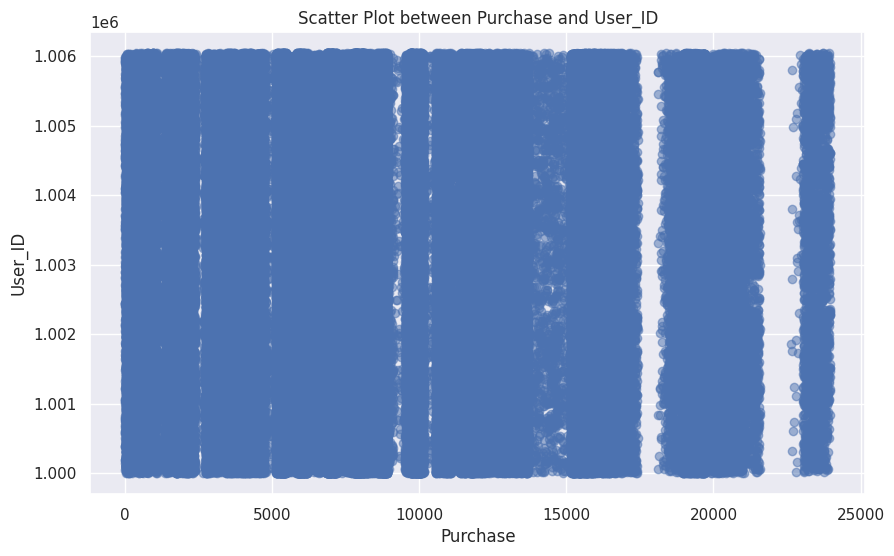

In [59]:
# Scatter plot between 'Purchase' and 'User_ID'
plt.figure(figsize=(10, 6))
plt.scatter(data['Purchase'], data['User_ID'], alpha=0.5)
plt.title('Scatter Plot between Purchase and User_ID')
plt.xlabel('Purchase')
plt.ylabel('User_ID')
plt.show()

# Dealing with missing values, now using the filtered dataframe

### As we have seen earlier that there were missing values only available in two columns. Let's recap that by the follwing code below:

In [110]:
data_filtered.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166360
Product_Category_3            375969
Purchase                           0
dtype: int64

<Axes: >

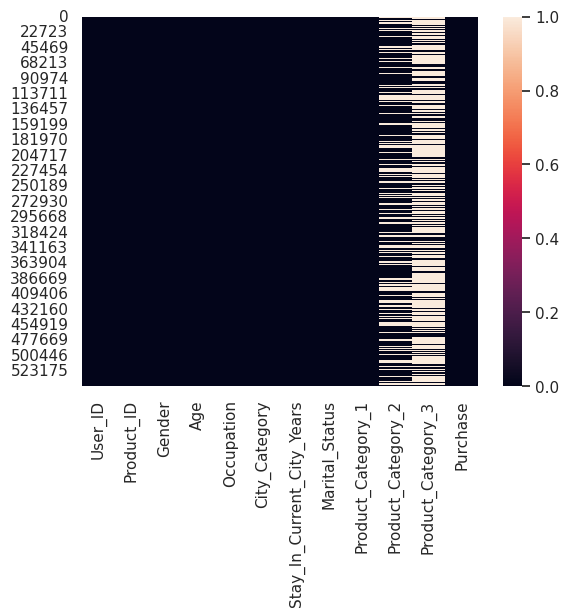

In [111]:
sns.heatmap(data_filtered.isna())

In [109]:
missing_values = pd.DataFrame({'Total missing':data_filtered.isna().sum(), 'missing_percent':(data_filtered.isna().sum()/data_filtered.isna().count()*100).round(2)})
missing_values.sort_values(by='Total missing', ascending = False).head(2)

,Total missing,missing_percent
Product_Category_3,375969,69.27
Product_Category_2,166360,30.65


### From the above observation we see that Product_Category_3 have the highest missing values having 70% approximately in the dataset.
### There in the other hand we see that Product_Category_2 have missing values that is less than the half of the entries having 32% approximately in the dataset.

# Handling missing values in the columns Product_Category_2 and Product_Category_3 can be approached in several ways. Here are some common strategies:
1. Imputation with Mean/Median/Mode:  Imputing missing values with the measures of central tendency is irrelevant to this dataset. These features are categorical not numerical. Hence, we are not approaching with this method.
2. Imputation with Constants: Replace missing values with a predefined constant value ('0' in Product_Category_2 and '-1' in Product_Category_3). This is useful when we believe that missing values have a specific meaning.
3. Model-Based Imputation: Use more advanced techniques, such as predictive modeling, to impute missing values. This involves using other features in the dataset to predict the missing values.
from sklearn.impute import KNNImputer

In [112]:
print("Categories avaliable in Product_Category_2:\t",sorted(data['Product_Category_2'].unique()))
print("Categories avaliable in Product_Category_3:\t",sorted(data['Product_Category_3'].unique()))

Categories avaliable in Product_Category_2:	 [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Categories avaliable in Product_Category_3:	 [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


### From the above output while comparing we find some extra conclusion:
1. Product_Category_2 is missing 1, 19 and 20 if comapred with Product_Category_1, hence having 32% of missing features apprpoximately.
2. Product_Category_3 is missing 1,2,19 and 20, if compared with Product_Category_1, hence having 70% of missing features approximately.

## Before we deal with the missing values for the respective features based on the 3 strategies, let's take a backup of the filtered dataf-rame and then work on the new dat-frame. We will do iterate this process each time of each strategy. This is a process where we conserve the real data and work on further analysis and compare the differences.

In [113]:
# Creating a backup copy of the filtered dataframe
backup = data_filtered.copy()

# 1. Imputation with Constants (0, -1)

### Creating a replica for the dataframe to apply first strategy.

In [115]:
replica_1 = backup.copy()

In [116]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [117]:
replica_1.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166360
Product_Category_3            375969
Purchase                           0
dtype: int64

Replacing the missing values with constants:
1. Product_Category_2 with 0
2. Product_Category_3 with -1

In [118]:
# Imputing missing values in Product_Category_2 and Product_Category_3 with their respective modes
replica_1['Product_Category_2'].fillna(0, inplace=True)
replica_1['Product_Category_3'].fillna(-1, inplace=True)

### Let's verify the missing values if replaced with the constants respectively:

In [119]:
replica_1.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Let's verify again by finding the percentage of missing values which has been replaced by '0' for Product_Category_2:

In [127]:
print('The initial missing % in Product_Category_2 was',(((data_filtered['Product_Category_2']).isna().mean())*100).round(2),'%',
      '\nCurrent feature is replaced with 0', (((replica_1['Product_Category_2'] == 0).mean())*100).round(2),'%')

The initial missing % in Product_Category_2 was 30.65 % 
Current feature is replaced with 0 30.65 %


Let's verify again by finding the percentage of missing values which has been replaced by '-1' for Product_Category_3

In [128]:
print('The initial missing % in Product_Category_3 was',(((data_filtered['Product_Category_3']).isna().mean())*100).round(2),'%',
      '\nCurrent feature is replaced with -1', (((replica_1['Product_Category_3'] == -1).mean())*100).round(2),'%')

The initial missing % in Product_Category_3 was 69.27 % 
Current feature is replaced with -1 69.27 %


Now we see the change in correlation matrix after replacing missing values with constants(0,-1).

<ipython-input-130-b0f49646aae8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(replica_1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


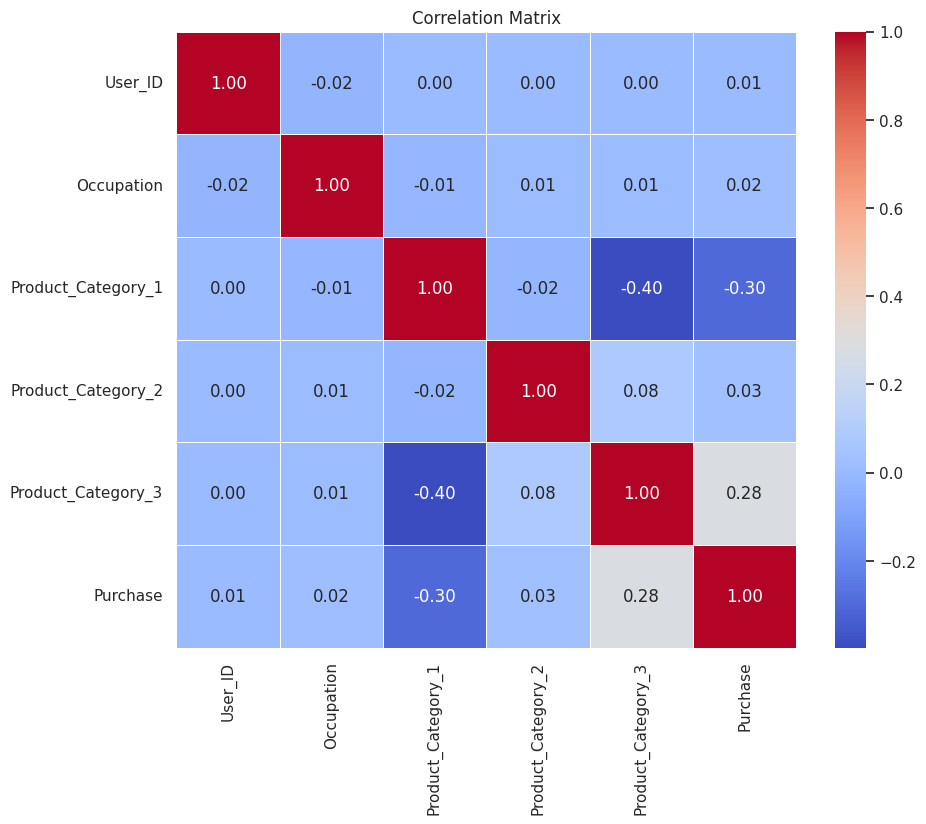

In [130]:
plt.figure(figsize=(10, 8))
sns.heatmap(replica_1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Checking the replaced values with constants in both the features:

In [131]:
print("Categories avaliable in Product_Category_2:\t",sorted(replica_1['Product_Category_2'].unique()))
print("Categories avaliable in Product_Category_3:\t",sorted(replica_1['Product_Category_3'].unique()))

Categories avaliable in Product_Category_2:	 [0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Categories avaliable in Product_Category_3:	 [-1.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [ ]:
print((replica_1['Product_Category_2'] == 0.0).sum(),'/',replica_1['Product_Category_2'].count(),'entries having missing values been replaced in Product_Category_2 with 0')
print((replica_1['Product_Category_3'] == -1.0).sum(),'/',replica_1['Product_Category_3'].count(),'entries having missing values been replaced in Product_Category_2 with -1')

173638 / 550068 entries having missing values been replaced in Product_Category_2 with 0
383247 / 550068 entries having missing values been replaced in Product_Category_2 with -1


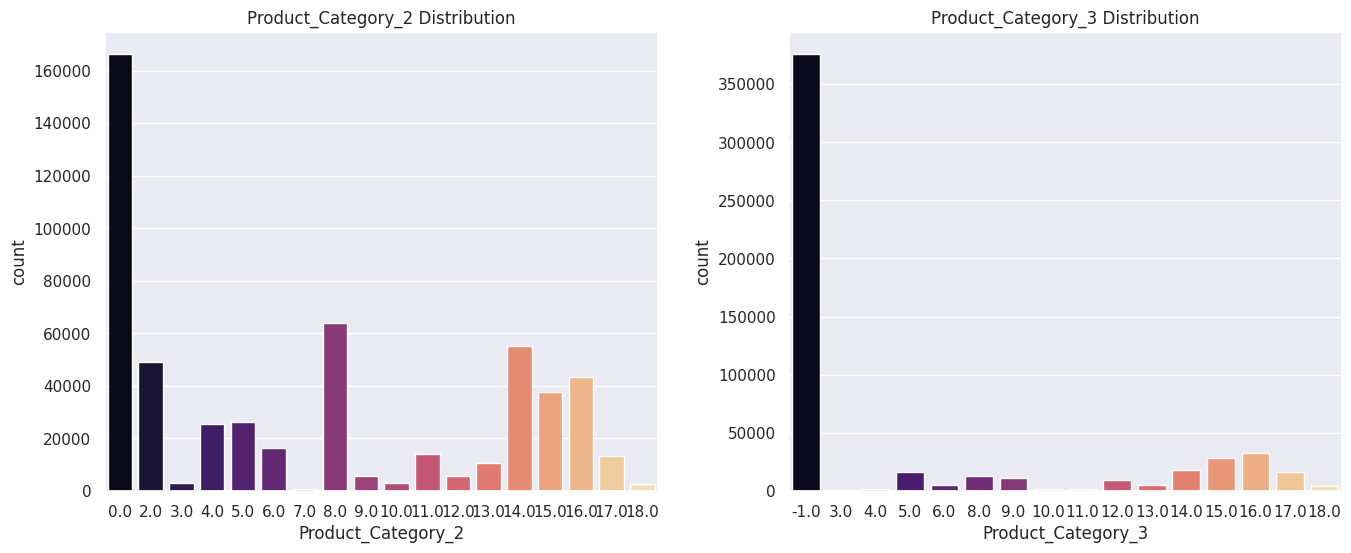

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax = ax.ravel()

# Count plot for the Product_Category_2
sns.countplot(data=replica_1, x='Product_Category_2', palette='magma', ax=ax[0])
ax[0].set_title('Product_Category_2 Distribution')
ax[0].set_xlabel('Product_Category_2')

# Count plot for the Product_Category_3
sns.countplot(data=replica_1, x='Product_Category_3', palette='magma', ax=ax[1])
ax[1].set_title('Product_Category_3 Distribution')
ax[1].set_xlabel('Product_Category_3')

plt.tight_layout(pad=2.0)
plt.show()

# 2. Model-Based Imputation:
## Using more advanced techniques, such as predictive modeling, to impute missing values. This involves using other features in the dataset to predict the missing values. from sklearn.impute import KNNImputer

In [133]:
replica_2=backup.copy()

In [134]:
(replica_2.isna().mean()*100).round(2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.65
Product_Category_3            69.27
Purchase                       0.00
dtype: float64

In [136]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=c4fbf0f4bd3d69720e44137693cbf6a1c70197b43ab38b83cd8471ea9776ffe9
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=f274f23c6d06c51c18225a7cf153d9316f66b8431fbcdf021cacc1ac5a1ae2c5
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [137]:
import time
from sklearn.impute import KNNImputer
from fancyimpute import KNN
from sklearn.model_selection import train_test_split

Let's take a sample and check the time taken for imputation:

In [138]:
subset_data = replica_2.sample(frac=0.1, random_state=42)  # Using a smaller subset for testing

# Identifying columns with missing values
columns_with_missing = subset_data.columns[subset_data.isnull().any()].tolist()

# Performing imputation
start_time = time.time()
imputer = KNNImputer(n_neighbors=5)
subset_data_imputed = imputer.fit_transform(subset_data[columns_with_missing])
elapsed_time = time.time() - start_time

print(f"Time taken for imputation: {elapsed_time:.2f} seconds")

Time taken for imputation: 160.12 seconds


The above code imputes a subset of the dataset, i.e. 10% of the dataset is utilized here for imputing missing values with KNN, with a random state ‘42’.
The reason here to take a subset of the dataset is to just show how we can use this method as well for imputing the missing values. As you can see the output states that, it took overall 160.12 seconds to process the subset utilizing the limited resource available on ‘Google Colab’ for free tier.
Imputing the whole dataset for missing values takes a lot of time and huge resource utilization, which when done in this case had a frequent breakdown while execution on free tier. It’s obvious that if the subset could process well the data, then the whole dataset would unless we take the premium tier on cloud services.


Counting if the subset has any missing values:

In [140]:
missing_values_1 = np.isnan(subset_data_imputed)

# Summing the missing values along each column
missing_values_count = np.sum(missing_values_1, axis=0)

# Displaying the count of missing values for each column
print(missing_values_count)

[0 0]


## Advantages and Disadvantages of using the given approaches:
1.	**Imputing Values with Constants (0, -1):**

Advantages:
Interpretability: Imputing with specific constants, especially meaningful ones like 0 or -1, can have interpretability in certain contexts. For example, imputing with 0 might make sense for count data or binary indicators.

Preservation of Zero or Negative Values: If the missing values are expected to be zero or negative, imputing with 0 or -1, respectively, preserves the information that the missing values are low or non-existent.

Simplicity: Like imputing with other constants, this approach is simple and easy to implement. It doesn't require model training and is computationally efficient.

Disadvantages:
Potential Bias: Imputing with specific constants may introduce bias, especially if the true values are not centred around 0 or -1. This bias can affect statistical analyses and model performance.

Incompatibility with Certain Models: Some machine learning models may interpret specific constant values differently. For instance, a model might treat 0 differently from other non-zero values, impacting the model's performance.

Loss of Information: Imputing with constants, regardless of the context, may lead to a loss of information. The variability in the imputed column is reduced, potentially affecting downstream analyses.

Dependence on Data Characteristics: The appropriateness of imputing with specific constants depends on the characteristics of the data. If the missing values are not expected to be exactly 0 or -1, imputing with these constants may not accurately represent the underlying data distribution.

**2.	Imputing Values with Models:**

Advantages:

Adaptability to Data Patterns: KNN imputation considers the similarities between samples, allowing it to adapt to the patterns in your data. It captures relationships and dependencies between variables.

Preserving Data Variability: KNN imputation can preserve the variability in the imputed column by considering the distribution of values in the local neighbourhood of each missing value.

Handling Non-Linearity: KNN imputation can capture non-linear relationships between variables, making it suitable for datasets where linear relationships are not sufficient.

Reducing Bias: Compared to simple constant imputation, KNN imputation can help reduce bias by providing imputed values that are more representative of the underlying data distribution.

Integration with Model Training: KNN imputation can be seamlessly integrated into the training process of machine learning models. It becomes part of the overall pipeline, allowing the model to be trained on a complete dataset.

Considerations:

Computational Cost: KNN imputation can be computationally expensive, especially for large datasets, as it involves calculating distances between data points. Consider the computational resources available and the scalability of the method.

Hyperparameter Tuning: KNN imputation has hyperparameters, such as the number of neighbours (k). The choice of k can impact imputation results. It may be necessary to tune hyperparameters to achieve optimal performance.

Sensitivity to Noise: KNN imputation can be sensitive to noise in the data, as it relies on similarity measures. Outliers or irrelevant features may affect the imputation results.

Assumption of Local Linearity: KNN imputation assumes local linearity, meaning that it approximates relationships between variables as locally linear. This might not be suitable for highly non-linear relationships.

The choice between imputing with constants and imputing with models depends on the specific characteristics of your dataset, the nature of the missingness, and your analysis goals. In some cases, a simple constant imputation might be sufficient, while in others, a more sophisticated modelling approach may be necessary to obtain accurate and unbiased imputations. It's often recommended to explore and compare different imputation strategies to assess their impact on the analysis results.
